# Budget and Variance Analysis

In [1]:
### import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns',None)
%matplotlib inline

## What is the total budget allocated versus the actual sales revenue

In [14]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
calendar_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Calender.xlsx"
budget_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Budget.xlsx"

sales_df = pd.read_excel(sales_path)
calendar_df = pd.read_excel(calendar_path)
budget_df = pd.read_excel(budget_path)

# Merge Sales and Calendar datasets
merged_sales = pd.merge(sales_df, calendar_df, left_on='OrderDate', right_on='Date', how='inner')

# Aggregate sales by Month and Year
monthly_sales = merged_sales.groupby(['Year', 'Month'])['SalesAmount'].sum().reset_index()

# Reshape Budget data to long format for monthly comparison
'''budget_melted = budget_df.melt(
    id_vars=['Category', 'Subcategory', 'ProductName', 'ProductKey'],
    var_name='MonthYear',
    value_name='Budget'
)
'''
budget_melted = budget_df.melt(
    id_vars=['AdventureWorks Budget Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
    var_name='MonthYear',
    value_name='Budget'
)


# Extract Year and Month from MonthYear in Budget data
budget_melted[['Month', 'Year']] = budget_melted['MonthYear'].str.extract(r'(\w+), (\d{4})')
budget_melted['Year'] = budget_melted['Year'].astype(int)

# Merge monthly sales with budget data
comparison_df = pd.merge(
    monthly_sales, 
    budget_melted, 
    on=['Year', 'Month'], 
    how='inner'
)

# Calculate variance
comparison_df['Variance'] = comparison_df['Budget'] - comparison_df['SalesAmount']

# Display results
comparison_df

,Year,Month,SalesAmount,AdventureWorks Budget Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,MonthYear,Budget,Variance


In [13]:
budget_df.columns

Index(['AdventureWorks Budget Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [7]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
calendar_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Calender.xlsx"
budget_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Budget.xlsx"

sales_df = pd.read_excel(sales_path)
calendar_df = pd.read_excel(calendar_path)
budget_df = pd.read_excel(budget_path)

# Merge Sales and Calendar datasets
merged_sales = pd.merge(sales_df, calendar_df, left_on='OrderDate', right_on='Date', how='inner')

# Aggregate sales by Month and Year
monthly_sales = merged_sales.groupby(['Year', 'Month'])['SalesAmount'].sum().reset_index()

# Reshape Budget data to long format for monthly comparison
budget_melted = budget_df.melt(
    var_name='MonthYear',
    value_name='Budget'
)

# Extract Year and Month from MonthYear in Budget data
budget_melted[['Month', 'Year']] = budget_melted['MonthYear'].str.extract(r'(\w+), (\d{4})')
budget_melted['Year'] = budget_melted['Year'].astype(float)

# Merge monthly sales with budget data
comparison_df = pd.merge(
    monthly_sales, 
    budget_melted, 
    on=['Year', 'Month'], 
    how='inner'
)

# Calculate variance
comparison_df['Variance'] = comparison_df['Budget'] - comparison_df['SalesAmount']

# Display results
comparison_df

,Year,Month,SalesAmount,MonthYear,Budget,Variance


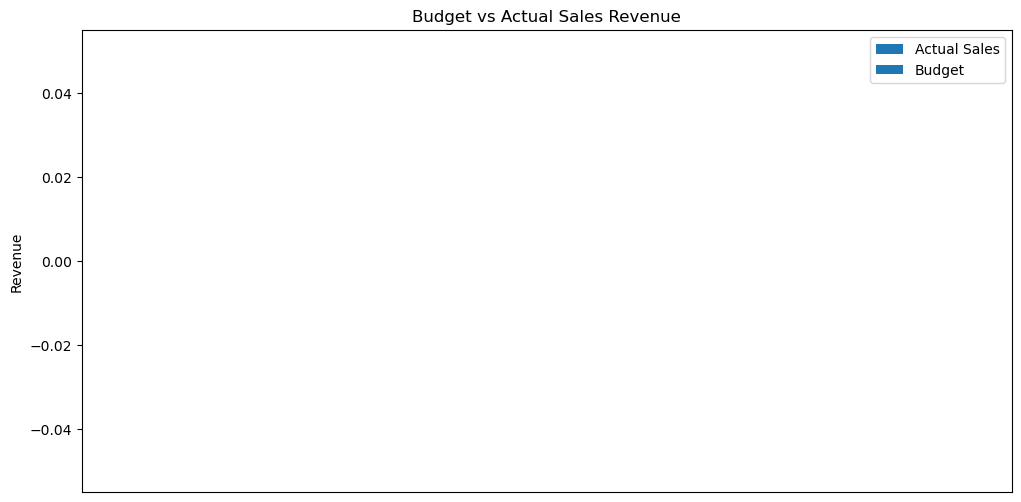

In [8]:
plt.figure(figsize=(12, 6))
width = 0.4
x = range(len(comparison_df))

plt.bar(x, comparison_df['SalesAmount'], width=width, label='Actual Sales', color='blue', align='center')
plt.bar(x, comparison_df['Budget'], width=width, label='Budget', color='orange', align='edge')
plt.xticks(x, comparison_df['Month'] + " " + comparison_df['Year'].astype(str), rotation=45)
plt.ylabel('Revenue')
plt.title('Budget vs Actual Sales Revenue')
plt.legend()
plt.show()

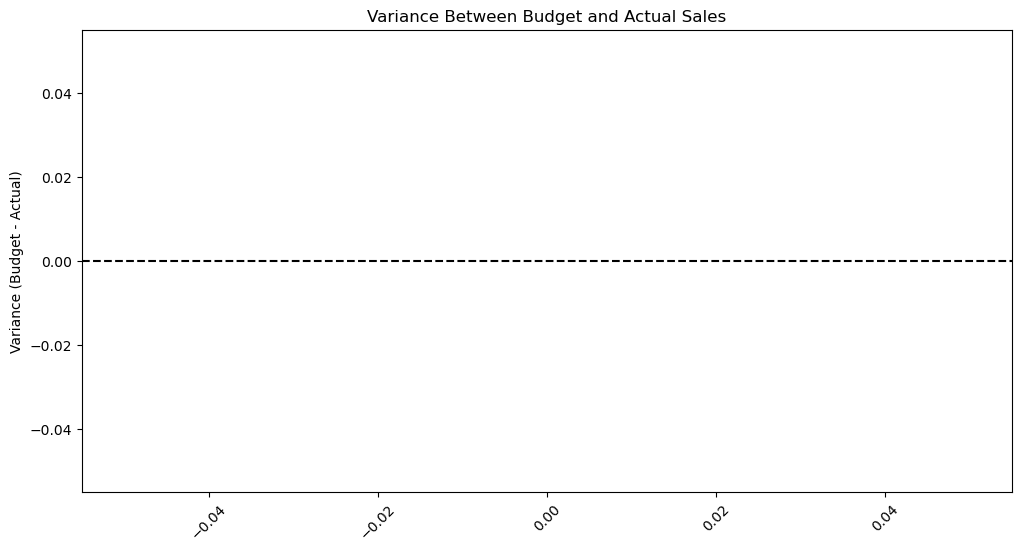

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Month'] + " " + comparison_df['Year'].astype(str), comparison_df['Variance'], marker='o', color='red')
plt.xticks(rotation=45)
plt.ylabel('Variance (Budget - Actual)')
plt.title('Variance Between Budget and Actual Sales')
plt.axhline(0, color='black', linestyle='--')
plt.show()

## What is the variance (difference) between budget and actual sales revenue

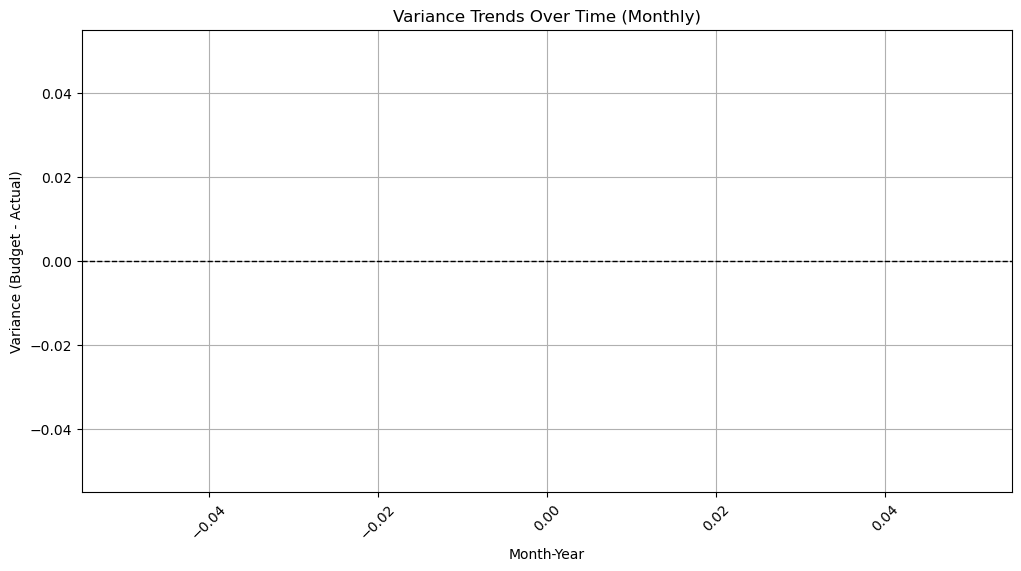

In [15]:
# Group variance by Month and Year for monthly trends
monthly_variance = comparison_df.groupby(['Year', 'Month'])['Variance'].sum().reset_index()

# Sort by Year and Month for correct ordering
monthly_variance['MonthYear'] = monthly_variance['Month'] + " " + monthly_variance['Year'].astype(str)
monthly_variance = monthly_variance.sort_values(by=['Year', 'Month'])

# Plot Monthly Variance Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_variance['MonthYear'], monthly_variance['Variance'], marker='o', color='red')
plt.title('Variance Trends Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Variance (Budget - Actual)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a reference line for zero variance
plt.grid()
plt.show()

In [16]:
# Group by Year and Quarter
quarterly_variance = comparison_df.groupby(['Year', 'Quarter'])['Variance'].sum().reset_index()

# Combine Year and Quarter for labels
quarterly_variance['QuarterYear'] = "Q" + quarterly_variance['Quarter'].astype(str) + " " + quarterly_variance['Year'].astype(str)

# Plot Quarterly Variance Trends
plt.figure(figsize=(10, 5))
plt.plot(quarterly_variance['QuarterYear'], quarterly_variance['Variance'], marker='o', color='blue')
plt.title('Variance Trends Over Time (Quarterly)')
plt.xlabel('Quarter-Year')
plt.ylabel('Variance (Budget - Actual)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid()
plt.show()

KeyError: 'Quarter'

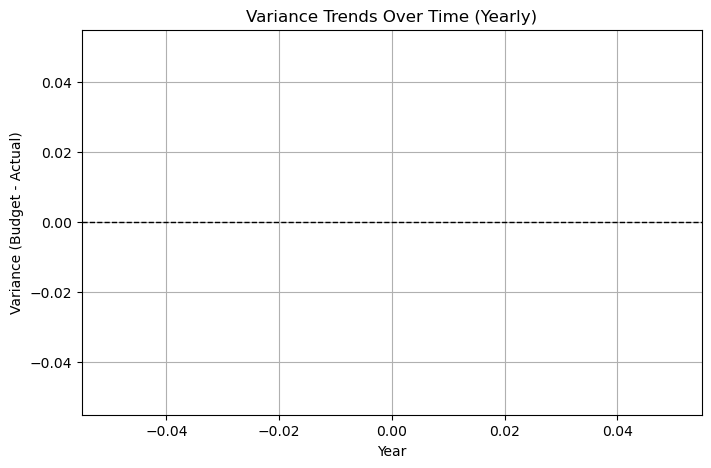

In [19]:
# Group by Year
yearly_variance = comparison_df.groupby('Year')['Variance'].sum().reset_index()

# Plot Yearly Variance Trends
plt.figure(figsize=(8, 5))
plt.bar(yearly_variance['Year'], yearly_variance['Variance'], color='green')
plt.title('Variance Trends Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Variance (Budget - Actual)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid()
plt.show()